In [1]:
import pickle
import re
from datetime import datetime
import numpy as np
randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *

In [2]:
pd.options.mode.chained_assignment = None
pd.__version__

'0.15.2'

In [3]:
with open('movies2.pkl', 'r') as f:
    moviesdata = pickle.load(f)
years = range(1999, 2014)

In [4]:
moviesdata.head(3)

,nominations,oscars,theaters,title,worldgross,year
0,3,0,3126,Star Wars: Episode I - The Phantom Menace,1027044677,1999-12-31
1,6,0,2821,The Sixth Sense,672806292,1999-12-31
2,1,0,3257,Toy Story 2,485015179,1999-12-31


In [5]:
len(moviesdata)

544

In [6]:
md = moviesdata[moviesdata.title != ('Twin Sisters')]
md['gross'] = md['worldgross'] / md['theaters']
md['awarded'] = md['oscars'] > 0

In [7]:
md.head(3)

,nominations,oscars,theaters,title,worldgross,year,gross,awarded
0,3,0,3126,Star Wars: Episode I - The Phantom Menace,1027044677,1999-12-31,328549.160909,False
1,6,0,2821,The Sixth Sense,672806292,1999-12-31,238499.217299,False
2,1,0,3257,Toy Story 2,485015179,1999-12-31,148914.700338,False


In [8]:
len(md)

543

In [9]:
mdw = md[md.awarded == True]
mdnw = md[md.awarded == False]

In [10]:
mdnom = md.groupby(['nominations'])
mdnom = mdnom.mean()
mdnom = mdnom.reset_index()
mdnom.head(3)

,nominations,oscars,theaters,worldgross,gross,awarded
0,1,0.125000,1375.335714,1.267125e+08,107047.453917,0.125000
1,2,0.279070,1824.069767,1.922254e+08,109590.241121,0.232558
2,3,0.395833,2077.500000,3.173186e+08,126599.034692,0.291667


In [11]:
mdoscall = md.groupby(['oscars'])
mdoscall = mdoscall.mean()
mdoscall = mdoscall.reset_index()
mdoscall.head(3)

,oscars,nominations,theaters,worldgross,gross,awarded
0,0,1.763780,1581.884514,1.619038e+08,106418.119507,False
1,1,3.010101,1696.313131,1.663717e+08,105417.120428,True
2,2,5.535714,2450.678571,3.815923e+08,139262.793538,True


In [12]:
mdosc = mdw.groupby(['oscars'])
mdosc = mdosc.mean()
mdosc = mdosc.reset_index()
mdosc.head(3)

,oscars,nominations,theaters,worldgross,gross,awarded
0,1,3.010101,1696.313131,1.663717e+08,105417.120428,True
1,2,5.535714,2450.678571,3.815923e+08,139262.793538,True
2,3,7.142857,2363.500000,4.213766e+08,151124.890474,True


In [13]:
mdgt = mdw.groupby(['year', 'awarded'])
mdmt = mdgt.mean()
mdmt

,,nominations,oscars,theaters,worldgross,gross
year,awarded,,,,,
1999-12-31,True,3.571429,2.142857,2130.142857,2.398350e+08,156146.161943
2000-12-31,True,5.111111,2.111111,2240.777778,1.887922e+08,75854.834301
2001-12-31,True,5.400000,1.800000,2252.500000,2.803007e+08,109350.116589
2002-12-31,True,5.090909,1.818182,1434.090909,2.144231e+08,157261.134153
2003-12-31,True,4.700000,2.200000,1706.500000,2.834938e+08,152145.221865
2004-12-31,True,4.500000,1.750000,2012.750000,2.148303e+08,121575.677591
2005-12-31,True,3.916667,1.666667,2322.250000,2.074939e+08,76498.163527
2006-12-31,True,3.846154,1.615385,1730.538462,1.981067e+08,94937.613551
2007-12-31,True,4.153846,1.538462,1957.307692,1.962587e+08,138002.040424


In [14]:
mdmt = mdmt.reset_index()
mdmt['year'] = years
mdmt

,year,awarded,nominations,oscars,theaters,worldgross,gross
0,1999,True,3.571429,2.142857,2130.142857,2.398350e+08,156146.161943
1,2000,True,5.111111,2.111111,2240.777778,1.887922e+08,75854.834301
2,2001,True,5.400000,1.800000,2252.500000,2.803007e+08,109350.116589
3,2002,True,5.090909,1.818182,1434.090909,2.144231e+08,157261.134153
4,2003,True,4.700000,2.200000,1706.500000,2.834938e+08,152145.221865
5,2004,True,4.500000,1.750000,2012.750000,2.148303e+08,121575.677591
6,2005,True,3.916667,1.666667,2322.250000,2.074939e+08,76498.163527
7,2006,True,3.846154,1.615385,1730.538462,1.981067e+08,94937.613551
8,2007,True,4.153846,1.538462,1957.307692,1.962587e+08,138002.040424
9,2008,True,5.090909,2.000000,1690.000000,2.332077e+08,100351.533480


In [15]:
mdgf = mdnw.groupby(['year', 'awarded'])
mdmf = mdgf.mean()
mdmf

,,nominations,oscars,theaters,worldgross,gross
year,awarded,,,,,
1999-12-31,False,2.173913,0,1942.608696,1.898343e+08,86217.521566
2000-12-31,False,1.708333,0,1352.000000,1.064302e+08,86466.918388
2001-12-31,False,1.600000,0,1324.750000,1.425776e+08,99941.254106
2002-12-31,False,1.789474,0,2288.210526,2.257850e+08,101727.132386
2003-12-31,False,1.888889,0,888.333333,8.329537e+07,76069.459951
2004-12-31,False,1.625000,0,1738.958333,2.121923e+08,155407.777371
2005-12-31,False,1.807692,0,1398.846154,1.699854e+08,216506.745824
2006-12-31,False,1.580645,0,1589.419355,1.115047e+08,135497.873439
2007-12-31,False,1.560000,0,1578.160000,1.308372e+08,68590.745889


In [16]:
mdmf = mdmf.reset_index()
mdmf['year'] = years
mdmf

,year,awarded,nominations,oscars,theaters,worldgross,gross
0,1999,False,2.173913,0,1942.608696,1.898343e+08,86217.521566
1,2000,False,1.708333,0,1352.000000,1.064302e+08,86466.918388
2,2001,False,1.600000,0,1324.750000,1.425776e+08,99941.254106
3,2002,False,1.789474,0,2288.210526,2.257850e+08,101727.132386
4,2003,False,1.888889,0,888.333333,8.329537e+07,76069.459951
5,2004,False,1.625000,0,1738.958333,2.121923e+08,155407.777371
6,2005,False,1.807692,0,1398.846154,1.699854e+08,216506.745824
7,2006,False,1.580645,0,1589.419355,1.115047e+08,135497.873439
8,2007,False,1.560000,0,1578.160000,1.308372e+08,68590.745889
9,2008,False,1.695652,0,1491.347826,1.283056e+08,78388.931536


In [17]:
mdmt_lm = smf.ols("gross ~ year", mdmt).fit()
mdmt_lm.summary()

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                 0.0002592
Date:                Fri, 24 Apr 2015   Prob (F-statistic):              0.987
Time:                        09:54:32   Log-Likelihood:                -175.03
No. Observations:                  15   AIC:                             354.1
Df Residuals:                      13   BIC:                             355.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.804e+05   3.64e+06      0.050      0.961     -7.69e+06  8.05e+06
year         -29.2264   1815.283     -0.016      0.987     -3950.906  3892.453
==============================================================================
Omnibus:                        3.313   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                1.286
Skew:                          -0.249   Prob(JB):                        0.526
Kurtosis:                       1.655   Cond. No.                     9.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
mdmf_lm = smf.ols("gross ~ year", mdmf).fit()
mdmf_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                   0.09196
Date:                Fri, 24 Apr 2015   Prob (F-statistic):              0.766
Time:                        09:54:34   Log-Likelihood:                -179.70
No. Observations:                  15   AIC:                             363.4
Df Residuals:                      13   BIC:                             364.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.614e+06   4.97e+06      0.325      0.751     -9.12e+06  1.24e+07
year        -751.3930   2477.761     -0.303      0.766     -6104.271  4601.485
==============================================================================
Omnibus:                       11.777   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.884
Skew:                           1.557   Prob(JB):                       0.0194
Kurtosis:                       4.710   Cond. No.                     9.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
mdwth_lm = smf.ols(formula='theaters ~ nominations + oscars', data=mdw).fit()
mdwth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               theaters   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     10.70
Date:                Fri, 24 Apr 2015   Prob (F-statistic):           4.37e-05
Time:                        09:54:35   Log-Likelihood:                -1381.4
No. Observations:                 162   AIC:                             2769.
Df Residuals:                     159   BIC:                             2778.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1340.0346    174.001      7.701      0.000       996.383  1683.687
nominations   126.3165     41.212      3.065      0.003        44.922   207.711
oscars         42.0636     86.514      0.486      0.627      -128.800   212.928
==============================================================================
Omnibus:                       42.326   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.303
Skew:                           0.404   Prob(JB):                      0.00213
Kurtosis:                       1.919   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
mdnwth_lm = smf.ols(formula='theaters ~ oscars', data=mdnw).fit()
mdnwth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               theaters   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 24 Apr 2015   Prob (F-statistic):                nan
Time:                        09:54:37   Log-Likelihood:                -3316.8
No. Observations:                 381   AIC:                             6636.
Df Residuals:                     380   BIC:                             6639.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1581.8845     74.920     21.114      0.000      1434.574  1729.195
oscars              0          0        nan        nan             0         0
==============================================================================
Omnibus:                     9084.221   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.004
Skew:                           0.404   Prob(JB):                     7.57e-10
Kurtosis:                       1.589   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
mdth_lm = smf.ols(formula='oscars ~ nominations', data=md).fit()
mdth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oscars   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     546.0
Date:                Fri, 24 Apr 2015   Prob (F-statistic):           5.15e-84
Time:                        09:54:39   Log-Likelihood:                -677.21
No. Observations:                 543   AIC:                             1358.
Df Residuals:                     541   BIC:                             1367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3328      0.053     -6.323      0.000        -0.436    -0.229
nominations     0.3411      0.015     23.367      0.000         0.312     0.370
==============================================================================
Omnibus:                      302.005   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6014.642
Skew:                           1.995   Prob(JB):                         0.00
Kurtosis:                      18.809   Cond. No.                         5.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
nomoscgross_lm = smf.ols(formula='gross ~ nominations + oscars', data=mdnom).fit()
nomoscgross_lm.summary()

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1.602
Date:                Fri, 24 Apr 2015   Prob (F-statistic):              0.249
Time:                        09:54:41   Log-Likelihood:                -157.53
No. Observations:                  13   AIC:                             321.1
Df Residuals:                      10   BIC:                             322.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     1.09e+05   3.33e+04      3.272      0.008      3.48e+04  1.83e+05
nominations -3323.9478   8909.409     -0.373      0.717     -2.32e+04  1.65e+04
oscars       2.006e+04   1.87e+04      1.074      0.308     -2.16e+04  6.17e+04
==============================================================================
Omnibus:                       22.711   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.965
Skew:                           2.205   Prob(JB):                     1.70e-05
Kurtosis:                       7.594   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
nomosctheat_lm = smf.ols(formula='theaters ~ nominations + oscars', data=mdnom).fit()
nomosctheat_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               theaters   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     8.854
Date:                Fri, 24 Apr 2015   Prob (F-statistic):            0.00612
Time:                        09:54:45   Log-Likelihood:                -92.674
No. Observations:                  13   AIC:                             191.3
Df Residuals:                      10   BIC:                             193.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1550.1488    227.010      6.829      0.000      1044.338  2055.960
nominations    76.7590     60.718      1.264      0.235       -58.529   212.047
oscars         68.6019    127.277      0.539      0.602      -214.988   352.192
==============================================================================
Omnibus:                       11.894   Durbin-Watson:                   2.639
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.156
Skew:                          -1.518   Prob(JB):                       0.0279
Kurtosis:                       4.998   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
nomgross_lm = smf.ols(formula='gross ~ nominations', data=mdnom).fit()
nomgross_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.023
Date:                Fri, 24 Apr 2015   Prob (F-statistic):              0.183
Time:                        09:54:49   Log-Likelihood:                -158.24
No. Observations:                  13   AIC:                             320.5
Df Residuals:                      11   BIC:                             321.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     9.28e+04   2.99e+04      3.102      0.010       2.7e+04  1.59e+05
nominations  5360.5927   3768.984      1.422      0.183     -2934.886  1.37e+04
==============================================================================
Omnibus:                       18.881   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.829
Skew:                           1.913   Prob(JB):                     0.000365
Kurtosis:                       6.819   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
nomtheat_lm = smf.ols(formula='theaters ~ nominations', data=mdnom).fit()
nomtheat_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               theaters   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     18.62
Date:                Fri, 24 Apr 2015   Prob (F-statistic):            0.00122
Time:                        09:54:52   Log-Likelihood:                -92.860
No. Observations:                  13   AIC:                             189.7
Df Residuals:                      11   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1494.8067    195.825      7.633      0.000      1063.798  1925.815
nominations   106.4577     24.672      4.315      0.001        52.156   160.760
==============================================================================
Omnibus:                        9.780   Durbin-Watson:                   2.622
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                5.392
Skew:                          -1.383   Prob(JB):                       0.0675
Kurtosis:                       4.517   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
oscgross_lm = smf.ols(formula='gross ~ oscars', data=mdoscall).fit()
oscgross_lm.summary()

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     7.818
Date:                Fri, 24 Apr 2015   Prob (F-statistic):             0.0233
Time:                        09:54:58   Log-Likelihood:                -120.34
No. Observations:                  10   AIC:                             244.7
Df Residuals:                       8   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.961e+04   2.55e+04      3.519      0.008      3.09e+04  1.48e+05
oscars      1.249e+04   4466.346      2.796      0.023      2189.195  2.28e+04
==============================================================================
Omnibus:                        0.034   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.199
Skew:                          -0.101   Prob(JB):                        0.905
Kurtosis:                       2.340   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
osctheat_lm = smf.ols(formula='theaters ~ oscars', data=mdoscall).fit()
osctheat_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               theaters   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 24 Apr 2015   Prob (F-statistic):             0.0111
Time:                        09:55:00   Log-Likelihood:                -76.179
No. Observations:                  10   AIC:                             156.4
Df Residuals:                       8   BIC:                             157.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1689.9285    307.489      5.496      0.001       980.857  2399.000
oscars       177.3180     53.937      3.287      0.011        52.939   301.697
==============================================================================
Omnibus:                        4.004   Durbin-Watson:                   2.804
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                0.945
Skew:                          -0.582   Prob(JB):                        0.624
Kurtosis:                       3.956   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


{'boxes': [<matplotlib.lines.Line2D at 0x1102a36d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1102bb650>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1102c6310>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1102a3950>,
  <matplotlib.lines.Line2D at 0x1102d1610>]}

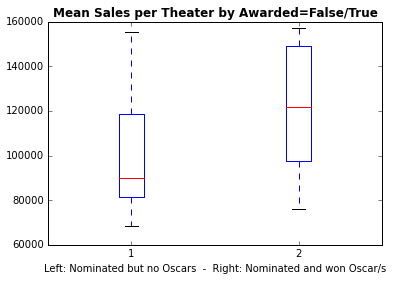

In [28]:
%pylab inline
plt.title('Mean Sales per Theater by Awarded=False/True', fontweight='bold')
data=[mdmf['gross'], mdmt['gross']]
plt.xlabel('Left: Nominated but no Oscars  -  Right: Nominated and won Oscar/s')
plt.boxplot(data, 0, '', manage_xticks=True)

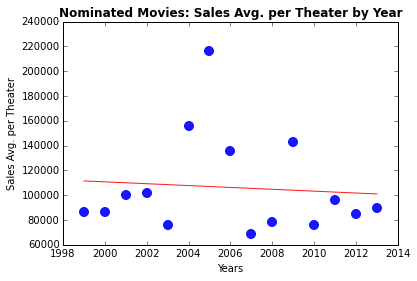

In [29]:
plt.scatter(mdmf['year'], mdmf['gross'], alpha=0.9, s=80, color='blue')
plt.title('Nominated Movies: Sales Avg. per Theater by Year', fontweight='bold')
plt.xlabel("Years")
plt.ylabel("Sales Avg. per Theater")
plt.plot(mdmf['year'], mdmf_lm.params[0] + (mdmf_lm.params[1] * mdmf['year']), 'r', alpha=0.9)

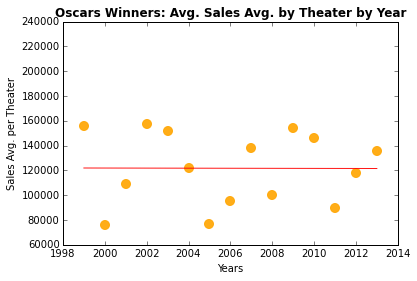

In [30]:
plt.scatter(mdmt['year'], mdmt['gross'], alpha=0.9, s=80, color='orange')
plt.title('Oscars Winners: Avg. Sales Avg. by Theater by Year', fontweight='bold')
plt.ylim(60000, 240000)
plt.xlabel("Years")
plt.ylabel("Sales Avg. per Theater")
plt.plot(mdmt['year'], mdmt_lm.params[0] + (mdmt_lm.params[1] * mdmt['year']), 'r', alpha=0.9)

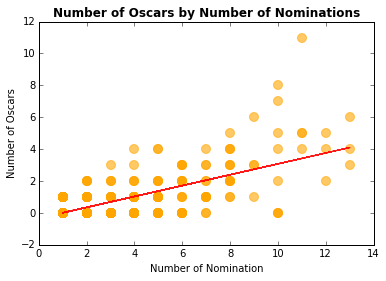

In [31]:
plt.scatter(md['nominations'], md['oscars'], alpha=0.6, s=80, color='orange')
plt.title('Number of Oscars by Number of Nominations', fontweight='bold')
plt.xlabel("Number of Nomination")
plt.ylabel("Number of Oscars")
plt.plot(md['nominations'], mdth_lm.params[0] + (mdth_lm.params[1] * md['nominations']), 'r', alpha=0.9)

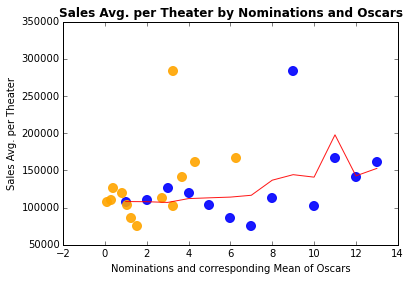

In [32]:
plt.scatter(mdnom['nominations'], mdnom['gross'], alpha=0.9, s=80, color='blue')
plt.scatter(mdnom['oscars'], mdnom['gross'], alpha=0.9, s=80, color='orange')
plt.title('Sales Avg. per Theater by Nominations and Oscars', fontweight='bold')
plt.ylim(50000, 350000)
plt.xlabel("Nominations and corresponding Mean of Oscars")
plt.ylabel("Sales Avg. per Theater")
plt.plot(mdnom['nominations'], nomoscgross_lm.params[0] + (nomoscgross_lm.params[1] * mdnom['nominations'])\
        + (nomoscgross_lm.params[2] * mdnom['oscars']), 'r', alpha=0.9)

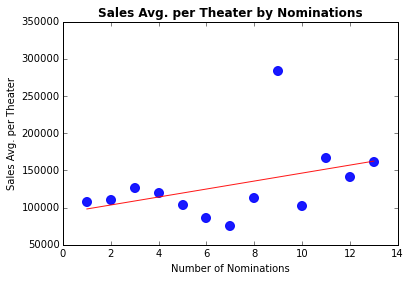

In [33]:
plt.scatter(mdnom['nominations'], mdnom['gross'], alpha=0.9, s=80, color='blue')
plt.title('Sales Avg. per Theater by Nominations', fontweight='bold')
plt.ylim(50000, 350000)
plt.xlabel("Number of Nominations")
plt.ylabel("Sales Avg. per Theater")
plt.plot(mdnom['nominations'], nomgross_lm.params[0] + (nomgross_lm.params[1] * mdnom['nominations']), 'r', alpha=0.9)

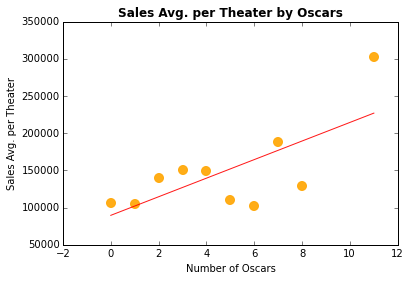

In [34]:
plt.scatter(mdoscall['oscars'], mdoscall['gross'], alpha=0.9, s=80, color='orange')
plt.title('Sales Avg. per Theater by Oscars', fontweight='bold')
plt.xlabel("Number of Oscars")
plt.ylabel("Sales Avg. per Theater")
plt.plot(mdoscall['oscars'], oscgross_lm.params[0] + (oscgross_lm.params[1] * mdoscall['oscars']), 'r', alpha=0.9)

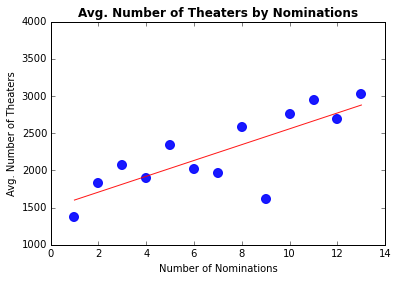

In [35]:
plt.scatter(mdnom['nominations'], mdnom['theaters'], alpha=0.9, s=80, color='blue')
plt.title('Avg. Number of Theaters by Nominations', fontweight='bold')
plt.ylim(1000, 4000)
plt.xlabel("Number of Nominations")
plt.ylabel("Avg. Number of Theaters")
plt.plot(mdnom['nominations'], nomtheat_lm.params[0] + (nomtheat_lm.params[1] * mdnom['nominations']), 'r', alpha=0.9)

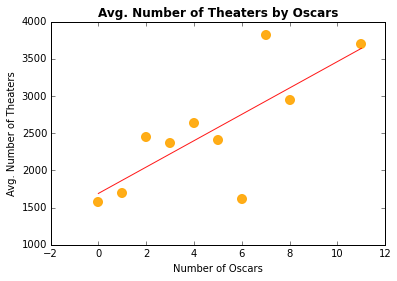

In [36]:
plt.scatter(mdoscall['oscars'], mdoscall['theaters'], alpha=0.9, s=80, color='orange')
plt.title('Avg. Number of Theaters by Oscars', fontweight='bold')
plt.xlabel("Number of Oscars")
plt.ylabel("Avg. Number of Theaters")
plt.plot(mdoscall['oscars'], osctheat_lm.params[0] + (osctheat_lm.params[1] * mdoscall['oscars']), 'r', alpha=0.9)

In [37]:
plt.show()

In [38]:
len(mdw)

162

In [39]:
all_lm = smf.ols(formula='worldgross ~ theaters + nominations + oscars', data=md).fit()
all_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             worldgross   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     199.4
Date:                Fri, 24 Apr 2015   Prob (F-statistic):           5.64e-87
Time:                        09:55:24   Log-Likelihood:                -11131.
No. Observations:                 543   AIC:                         2.227e+04
Df Residuals:                     539   BIC:                         2.229e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -5.674e+07   1.49e+07     -3.801      0.000     -8.61e+07 -2.74e+07
theaters     1.365e+05   6013.195     22.692      0.000      1.25e+05  1.48e+05
nominations -1.051e+06   4.82e+06     -0.218      0.828     -1.05e+07  8.42e+06
oscars       2.974e+07   9.88e+06      3.009      0.003      1.03e+07  4.92e+07
==============================================================================
Omnibus:                      530.093   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34645.431
Skew:                           4.105   Prob(JB):                         0.00
Kurtosis:                      41.261   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
md[md.title == ('Avatar')]

,nominations,oscars,theaters,title,worldgross,year,gross,awarded
351,9,3,3461,Avatar,2787965087,2009-12-31,805537.442069,True


In [41]:
md[md.year == ]

SyntaxError: invalid syntax (<ipython-input-41-45e4bab994ab>, line 1)